In [162]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.linear_model import (Lasso, Ridge, ElasticNet, lasso_path, enet_path)

## Data

In [163]:
X, y = load_diabetes(return_X_y=True)
# X shape
X.shape

(442, 10)

## Computing regularization path

In [164]:
# lasso path
alphas_lasso, coefs_lasso, _ = lasso_path(X, y)

# elastic net path
alphas_enet, coefs_enet, _ = enet_path(X, y, l1_ratio=0.95)

# ridge path
n_alphas = 200
alphas_ridge = np.logspace(-2, 5, n_alphas)
rp = Ridge()

coefs_rp = []
for a in alphas_ridge:
    rp.set_params(alpha=a)
    rp.fit(X,y)
    coefs_rp.append(rp.coef_)

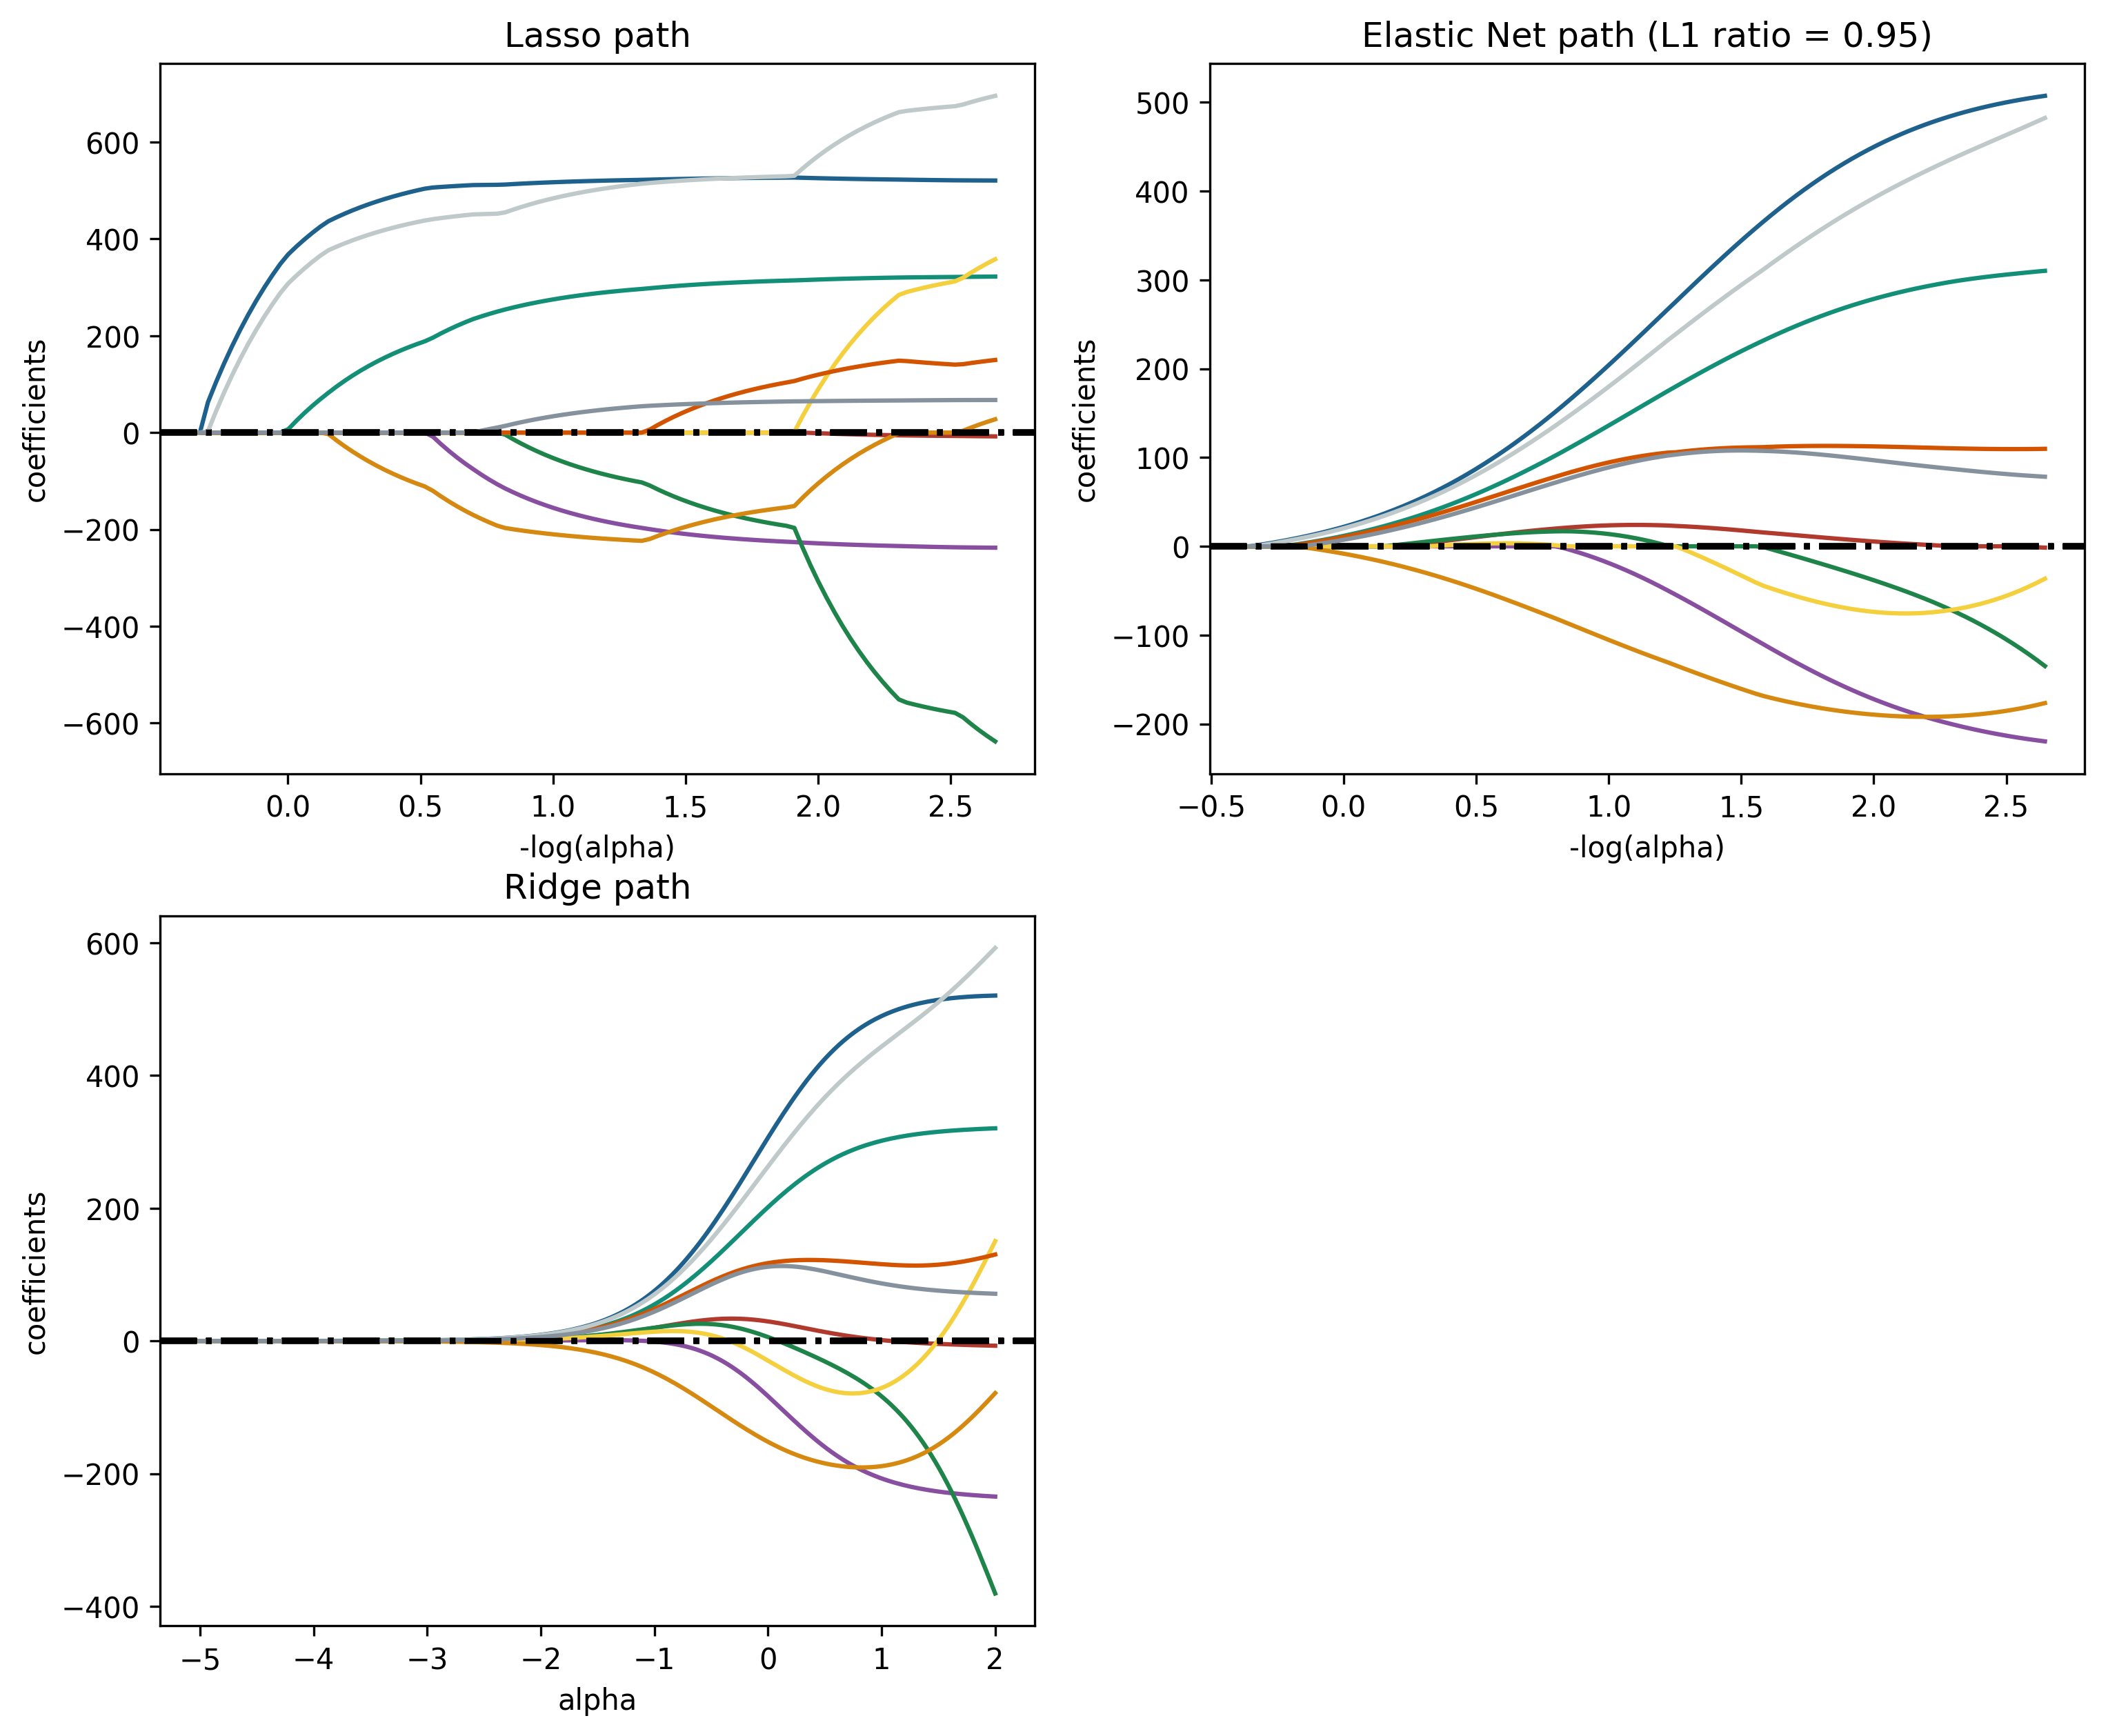

In [165]:
fig, splots = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.set_dpi(300)
sp1 = splots[0,0]
sp2 = splots[0,1]
sp3 = splots[1,0]
sp4 = splots[1,1]
sp4.set_axis_off()
colors = list(mcolors.CSS4_COLORS.keys())[:X.shape[1]]
colors = ['#B03A2E', '#884EA0', '#1F618D', '#148F77', '#1E8449',
          '#F4D03F', '#D68910', '#D35400', '#BFC9CA', '#85929E']

# lasso path
for coef_l, c in zip(coefs_lasso, colors):
    sp1.plot(-np.log10(alphas_lasso), coef_l, c)
    sp1.set_xlabel("-log(alpha)")
    sp1.set_ylabel('coefficients')
    sp1.set_title('Lasso path')
    sp1.axhline(y=0, lw=2, ls='-.', c='black')
    
# elastic net path
for coef_e, c in zip(coefs_enet, colors):
    sp2.plot(-np.log10(alphas_enet), coef_e, c)
    sp2.set_xlabel("-log(alpha)")
    sp2.set_ylabel('coefficients')
    sp2.set_title('Elastic Net path (L1 ratio = 0.95)')
    sp2.axhline(y=0, lw=2, ls='-.', c='black')
    
# ridge path 
coefs_rp = np.array(coefs_rp).T
for coef_r, c in zip(coefs_rp, colors):
    sp3.plot(-np.log10(alphas_ridge), coef_r, c)
    sp3.set_xlabel("alpha")
    sp3.set_ylabel('coefficients')
    sp3.set_title('Ridge path')
    sp3.axhline(y=0,lw=2, ls='-.', c='black')
    
plt.show()